# Equity Data Science Educational Series

### Monthly Data Science Lecture Series Part 1:
### An Introduction to Decision Trees, Random Forests, and Gradient Boosting Machines

All examples from today's EDS educational session are included within this Jupyter Notebook. For those new to Jupyter Notebooks, code blocks can be executed by selecting the desired cell and pressing 'shift+enter', or clicking the 'play' button that appears at the upper left of the block.

The ouput from executing the code contained within the cell will then appear immediately below the executed cell. Give the simple example below a try:

In [1]:
print("Jupyter Test - Welcome to the EDS Educational Series on Wednesday, August", 2**5-10)

Jupyter Test - Welcome to the EDS Educational Series on Wednesday, August 22


*Before we begin, please take a moment to install a visualization engine by executing the below cell:*

In [2]:
!pip install graphviz 
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fontconfig libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3 libgraphite2-3
  libgvc6 libgvpr2 libharfbuzz0b libjbig0 libltdl7 libpango-1.0-0
  libpangocairo-1.0-0 libpangoft2-1.0-0 libpathplan4 libpixman-1-0
  libthai-data libthai0 libtiff5 libwebp6 libxaw7 libxcb-render0 libxcb-shm0
  libxmu6 libxpm4 libxt6
Suggested packages:
  gsfonts graphviz-doc libgd-tools
The following NEW packages will be installed:
  fontconfig graphviz libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3
  libgraphite2-3 libgvc6 libgvpr2 libharfbuzz0b libjbig0 libltdl7
  libpango-1.0-0 libpangocairo-1.0-0 libpangoft2-1.0-0 libpathplan4
  libpixman-1-0 libthai-data libthai0 libtiff5 libwebp6 libxaw7 libxcb-render0
  libxcb-shm0 libxmu6 libxpm4 libxt6
0 upgraded, 28 newly installed, 0 to remove and 0 not upgraded.
Need to get 4,122 kB of archives.
After this operation, 2

# 1. Introduction

### The following topics will be discussed during today's session:

    > Decision Tree Modeling
        > Decision Tree Classification
        > Decision Tree Regression
    > Decision Tree Ensemble Methods
        > Random Forest
        > Gradient Boosting Machines

Code examples for today's session will utilize a dataset of median home prices across neighborhoods in the Boston Metropolitan area that is a common benchmark for algorithms in the machine learning community. Let's take a look at the data:

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

# load dataset
boston = load_boston()
housing = pd.DataFrame(boston.data)
housing['Median_Val'] = boston.target
housing.columns = ['Crime_Rate', 'Prop_Zoned', 'Prop_NonRetail', 'Borders_River',
                   'Conc_NO2', 'Avg_Rooms','Prop_Pre1940', 'Dist_Employ', 
                   'Hway_Access', 'Property_Tax', 'TeachStu_Ratio', 'B', 
                   'LSTAT', 'Median_Val']

# Dropping a few columns to reduce dimensions
drop_cols = ['B', 'LSTAT', 'Property_Tax']
housing = housing[[a_col for a_col in housing.columns if not a_col in drop_cols]]

# Print first 10 rows of the housing data set
housing.head(10)


,Crime_Rate,Prop_Zoned,Prop_NonRetail,Borders_River,Conc_NO2,Avg_Rooms,Prop_Pre1940,Dist_Employ,Hway_Access,TeachStu_Ratio,Median_Val
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,18.7,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,15.2,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,15.2,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,15.2,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,15.2,18.9


In order to also utilize the housing data to explore the application of decision trees to classification problems, we will add a categorical target that splits the median value into terciles for use in our decision tree classifiers:



In [31]:
# create categorical version of response variable [0 = lowest, 1 = middle, 2 = high]
housing['Val_Cat'] = pd.qcut(housing.Median_Val,3,labels = ["Low","Medium","High"])
housing.head(10)

,Crime_Rate,Prop_Zoned,Prop_NonRetail,Borders_River,Conc_NO2,Avg_Rooms,Prop_Pre1940,Dist_Employ,Hway_Access,TeachStu_Ratio,Median_Val,Val_Cat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,24.0,High
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,21.6,Medium
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,34.7,High
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,33.4,High
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,36.2,High
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,18.7,28.7,High
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,15.2,22.9,Medium
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,15.2,27.1,High
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,15.2,16.5,Low
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,15.2,18.9,Medium


As our objective is to build a predictive model that will work out of sample, let's split the dataset into a training, validation, and test set to gauge predictive accuracy.

In [0]:
# summary statistics for variables
from sklearn.model_selection import train_test_split

# split data into two groups: 80% train + validation, 20% test
housing_train, housing_test = train_test_split(housing, test_size = 0.2, random_state = 1991)

# split train data into two further groups (train + validation)
housing_train, housing_valid = train_test_split(housing_train, test_size = 0.2, random_state = 1991)

In [6]:
# We now have three data sets, 323 training data points, 81 validation data points, and 102 test data points
print("Training Data: Number of Rows, Number of Columns:", housing_train.shape)
print("Validation Data: Number of Rows, Number of Columns:",housing_valid.shape)
print("Testing Data: Number of Rows, Number of Columns:",housing_test.shape)

Training Data: Number of Rows, Number of Columns: (323, 12)
Validation Data: Number of Rows, Number of Columns: (81, 12)
Testing Data: Number of Rows, Number of Columns: (102, 12)


Let's take a quick peak at the summary statistics and correlations among variables in the training data:

In [7]:
# display summary statistics for training data
housing_train.describe()

,Crime_Rate,Prop_Zoned,Prop_NonRetail,Borders_River,Conc_NO2,Avg_Rooms,Prop_Pre1940,Dist_Employ,Hway_Access,TeachStu_Ratio,Median_Val
count,323.000000,323.00000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000
mean,3.684526,11.28483,10.976192,0.058824,0.551798,6.302260,69.454799,3.773225,9.102167,18.498762,23.016718
std,9.007261,23.55938,7.029174,0.235659,0.110495,0.742605,27.476607,2.102102,8.547934,2.204526,9.684865
min,0.006320,0.00000,0.740000,0.000000,0.389000,3.561000,6.000000,1.129600,1.000000,12.600000,5.000000
25%,0.078910,0.00000,4.950000,0.000000,0.451000,5.884500,45.800000,2.103450,4.000000,17.400000,17.150000
50%,0.222120,0.00000,8.560000,0.000000,0.538000,6.195000,77.000000,3.092300,5.000000,19.100000,21.200000
75%,2.542505,12.50000,18.100000,0.000000,0.624000,6.635000,94.750000,5.108550,8.000000,20.200000,26.900000
max,88.976200,100.00000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,22.000000,50.000000


In [8]:
# correlation matrix of variables
import seaborn as sborn
color_map= sborn.diverging_palette(5, 250, as_cmap=True)
feature_cor = housing_train.corr()
feature_cor.style.background_gradient(color_map, axis = 1)

,Crime_Rate,Prop_Zoned,Prop_NonRetail,Borders_River,Conc_NO2,Avg_Rooms,Prop_Pre1940,Dist_Employ,Hway_Access,TeachStu_Ratio,Median_Val
Crime_Rate,1,-0.191686,0.394611,-0.0533253,0.44593,-0.231909,0.340748,-0.374461,0.644814,0.272797,-0.387143
Prop_Zoned,-0.191686,1,-0.513589,-0.0360297,-0.503668,0.320949,-0.56226,0.626323,-0.298014,-0.390416,0.359773
Prop_NonRetail,0.394611,-0.513589,1,0.0363193,0.740753,-0.425986,0.639273,-0.692064,0.56267,0.40279,-0.488927
Borders_River,-0.0533253,-0.0360297,0.0363193,1,0.0504172,0.0729196,0.101612,-0.0803717,-0.0261181,-0.166043,0.205035
Conc_NO2,0.44593,-0.503668,0.740753,0.0504172,1,-0.319511,0.742748,-0.776038,0.617955,0.167138,-0.41802
Avg_Rooms,-0.231909,0.320949,-0.425986,0.0729196,-0.319511,1,-0.246268,0.212852,-0.25596,-0.411455,0.70709
Prop_Pre1940,0.340748,-0.56226,0.639273,0.101612,0.742748,-0.246268,1,-0.744433,0.445903,0.237972,-0.364776
Dist_Employ,-0.374461,0.626323,-0.692064,-0.0803717,-0.776038,0.212852,-0.744433,1,-0.481763,-0.20332,0.228815
Hway_Access,0.644814,-0.298014,0.56267,-0.0261181,0.617955,-0.25596,0.445903,-0.481763,1,0.426552,-0.365603
TeachStu_Ratio,0.272797,-0.390416,0.40279,-0.166043,0.167138,-0.411455,0.237972,-0.20332,0.426552,1,-0.522343


Before beginning any predictive modeling exercise, it is useful to:

    > Establish Measure of Model Performance
      > Mean Squared Error
    > Generate Lazy Performance Baseline
      > Average Value



In [0]:
# function to compute mean squared error
def mean_squared_error(predicted_values, actual_values):
    return np.mean((predicted_values - actual_values) ** 2)

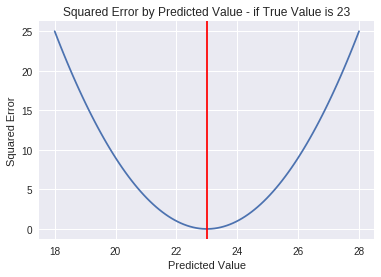

In [73]:
# plot mean-squared error

# generate a sequence from -5 to 5
my_seq = np.linspace(18,28,100)

# plot mse if true value is 23
my_error = [mean_squared_error(pred_val, 23) for pred_val in my_seq]

# generate plot
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(my_seq, my_error)
plt.ylabel('Squared Error')
plt.xlabel('Predicted Value')
plt.title('Squared Error by Predicted Value - if True Value is 23')
plt.axvline(x=23, color = 'red')

# 2. Decision Tree Modeling

Decision trees are a class of nonpametric models that partition datasets into sub-regions.

In predictive modeling tasks, predictions for new observations are generated by following the rules of the tree from root to leaf.

Let's take a look at a quick example. 

To simplify, we will start by only using two independent variables (*Average # Rooms* and *Distance to Employment Centers*), to predict which tercile the value falls in (categorical response).

In [0]:
# import decision tree building functions and visualization functions from sklearn
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn import tree
from IPython.display import display, SVG
from graphviz import Source

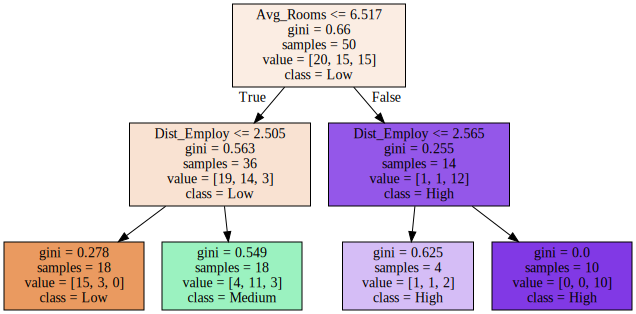

In [37]:
# fit a basic decision tree classifier on the training data
import os

ind_vars =['Avg_Rooms', 'Dist_Employ']
# specify that tree must have depth of no more than 2
classifier = DecisionTreeClassifier(max_depth = 2)
# sample first 50 observations from the training set
classifier.fit(housing_train.head(50)[ind_vars], housing_train.head(50).Val_Cat)

# Plot the tree
tree_plot = Source(tree.export_graphviz(classifier, out_file = None, 
                        feature_names = ind_vars, class_names = ['Low', 'Medium', 'High'],
                        filled = True))
display(SVG(tree_plot.pipe(format = 'svg')))

The above decision tree can be re-written as a series of simple if-then decision rules:

**IF** the average number of rooms in the neighborhood is less than (or equal to) **6.517** **THEN**
> **IF** the distance from employment index is less than (or equal to) **2.505** **THEN**

>> We predict "**Low**" value

> **IF** the distance from employment index is greater than **2.505** **THEN**

>> We predict "**Medium**" value
  
**IF** the average number of rooms in the neighborhood is greater than **6.517** **THEN**
> **IF** the distance from employment index is less than (or equal to) **2.565** **THEN**

>> We predict "**High**" value

> **IF** the distance from employment index is greater than **2.565** **THEN**

>> We predict "**High**" value (*but with greater confidence*)

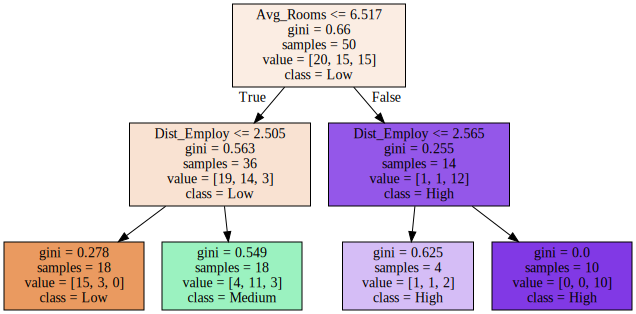

In [38]:
# plot the tree again
display(SVG(tree_plot.pipe(format = 'svg')))

The decision tree structure in the above plot was constructed by minimizing the Gini Impurity in a greedy fashion:

Gini Impurity: 1 - [prob(Low)^2 + prob(Medium)^2  + prob(High)^2]

For the bottom left node, for example, the Gini impurity is: 1-[(15/18)^2 + (3/18)^2 + (0/18)^2] = 0.278

Below, we plot the Gini impurity by split for the first decision in the tree to illustrate:


In [0]:
# define function to compute gini impurity
from collections import Counter
def compute_gini(resp_var):
  my_list = [((val * 1.0)/len(resp_var))**2 for val in Counter(resp_var).values()]
  gini = 1-np.sum(my_list)
  return gini


# define function to compute gini criterion for each possible split point
def create_gini_cutoffs(ind_var, resp_var):
  ind_var = list(ind_var)
  resp_var = list(resp_var)
  hold_values = []
  hold_impurity = []
  unique_vals = sorted(list(set(ind_var)))
  for a_val in unique_vals:
    if a_val < np.max(unique_vals):
      less_than_equal = [i for i, val in enumerate(ind_var) if val <= a_val]
      greater_than = list(set(list(range(0,50))) - set(less_than_equal))
      less_equal_resp = [val for i, val in enumerate(resp_var) if i in less_than_equal ]
      greater_resp = [val for i, val in enumerate(resp_var) if i in greater_than]
      impurity_less = compute_gini(less_equal_resp)
      impurity_greater = compute_gini(greater_resp)
      hold_values.append(a_val)
      hold_impurity.append(impurity_less * len(less_than_equal)/len(resp_var) + impurity_greater * len(greater_than)/len(resp_var))
  return hold_values, hold_impurity
    
ind_vars =['Avg_Rooms', 'Dist_Employ']
 
vals_room, gini_room = create_gini_cutoffs(housing_train.head(50)['Avg_Rooms'],housing_train.head(50)['Val_Cat'])
vals_dist, gini_dist = create_gini_cutoffs(housing_train.head(50)['Dist_Employ'],housing_train.head(50)['Val_Cat'])



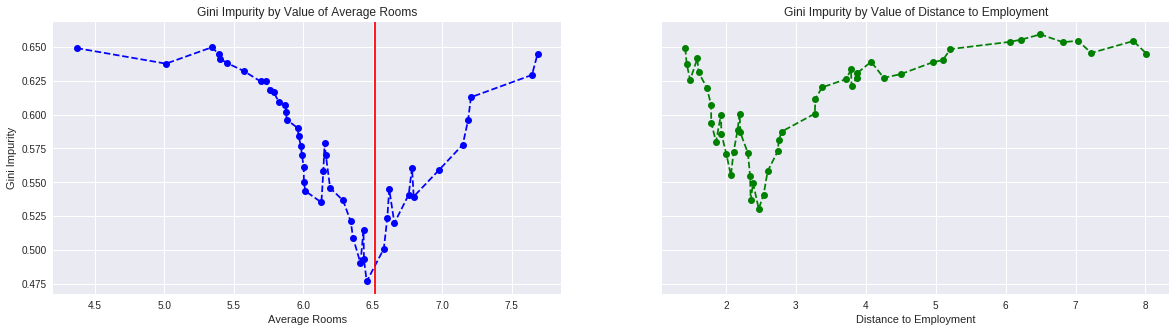

In [85]:
# plot the gini impurity by splitpoint
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (20,5))
ax1.plot(vals_room, gini_room, linestyle="--", marker = 'o', color='b')
ax1.set_title("Gini Impurity by Value of Average Rooms")
ax1.set_xlabel("Average Rooms")
ax1.set_ylabel("Gini Impurity")
ax2.plot(vals_dist,gini_dist, linestyle="--", marker = 'o', color='g')
ax2.set_title("Gini Impurity by Value of Distance to Employment")
ax2.set_xlabel("Distance to Employment")
ax1.axvline(x=6.517, color = 'red')


A simplified decision tree algorithm:

For every feature (here Average Rooms and Distance to Employment):
> Calculate the loss at each split point
Choose the feature and split point that minimizes the loss function (Gini impurity)

Repeat this process recursively on the 2 datasets resulting from this split

Keep going until either:
> Tree has no loss (default)

> Minimum number of observations allowed per leaf threshold is reached

> Maximum depth of tree allowed is reached

Let's now visualize the prediction surface that this decision tree is creating, and see how chaning the tuning parameters affects the model.

Note that to make the visualization more manageable, I have randomly selected only 150 values from the original training set. And again we will only use our 2 variables for the time being.

Text(0,0.5,'Distance to Employment')

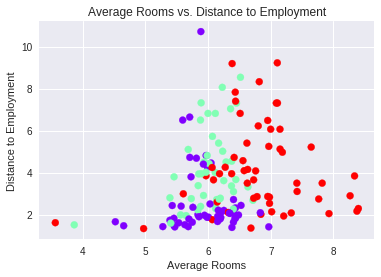

In [88]:

# subset of the training data to make visualization more manageable
train_sub1 = housing_train.sample(n=150, random_state=1991, replace=False)
train_sub1_x = train_sub1[['Avg_Rooms', 'Dist_Employ']]
train_sub1_y = train_sub1.Val_Cat
plt.scatter(train_sub1_x.Avg_Rooms, train_sub1_x.Dist_Employ, c=train_sub1_y, cmap = 'rainbow')
plt.title('Average Rooms vs. Distance to Employment')
plt.xlabel('Average Rooms')
plt.ylabel('Distance to Employment')


In [0]:
def plot_tree(max_depth, min_leaf = 0.2):
    estimator = DecisionTreeClassifier(random_state = 1991,
                                      max_depth = max_depth,
                                      min_samples_leaf = min_leaf)
    estimator = estimator.fit(train_sub1_x,train_sub1_y)
    
    graph = Source(tree.export_graphviz(estimator, out_file = None, feature_names = train_sub1_x.columns, 
                                       class_names = ['0', '1', '2'],
                                       filled = True))
    #plot_tree_boundaries(max_depth, train_sub2_x, train_sub2_y)
    display(SVG(graph.pipe(format = 'svg')))
    

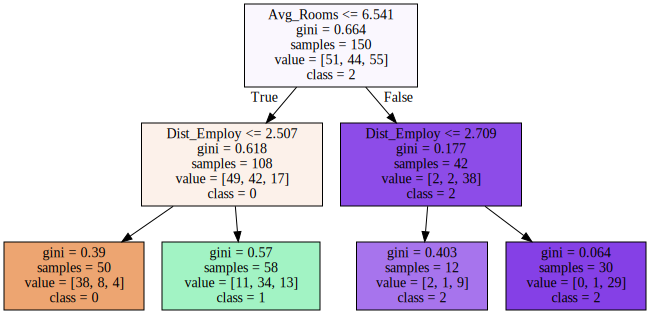

In [98]:
#@title Try changing the tree tuning parameters. { run: "auto" }
max_depth = 2 #@param {type:"slider", min:1, max:10, step:1}
min_leaf = 0.06 #@param {type:"slider", min:0.01, max:1, step:0.05}

plot_tree(max_depth, min_leaf)


In [0]:
def plot_tree_boundaries(max_depth, data_x, data_y, par = None, cmap = 'rainbow'):
    if par is None:
        par = plt.gca()
        
    # plot the training points
    par.scatter(data_x.values[:,0], data_x.values[:,1], c = data_y, s = 50, cmap = cmap, clim = (data_y.min(), data_y.max()), zorder = 3)
    par.axis('tight')
    #par.axis('off')
    par.set_xlabel('Average Rooms')
    par.set_ylabel('Distance to Employment')
    par.set_title("Decision Tree Prediction Surface")
    lim_x = par.get_xlim()
    lim_y = par.get_ylim()
    
    classifier = DecisionTreeClassifier(max_depth = max_depth)
    classifier.fit(data_x, data_y)
    mesh_x, mesh_y = np.meshgrid(np.linspace(*lim_x, num = 200), np.linspace(*lim_y, num = 200))
    mesh_preds = classifier.predict(np.c_[mesh_x.ravel(), mesh_y.ravel()]).reshape(mesh_x.shape)
    
    n_class = len(np.unique(data_y))
    mesh_colors = par.contourf(mesh_x, mesh_y, mesh_preds, alpha = 0.3, levels = np.arange(n_class + 1)-0.5, 
                               cmap=cmap, clim = (data_y.min(), data_y.max()), zorder = 1)
    
    par.set(xlim = lim_x, ylim = lim_y)
    

Below is the decision boundary for a tree of maximum depth 8. There appear to be some regions where the prediction surface is relatively noisy. 

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


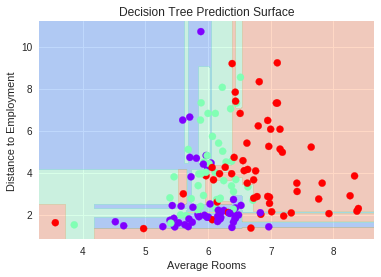

In [108]:
plot_tree_boundaries(8, train_sub1_x, train_sub1_y)

What happens if we take a new random subsample from the dataset? Do we get a similar decision surface?

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


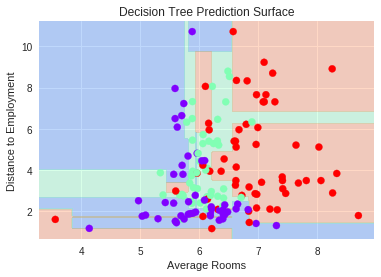

In [109]:
# subset of the training data to make visualization more manageable
train_sub2 = housing_train.sample(n=150, random_state=1992, replace=False)
train_sub2_x = train_sub2[['Avg_Rooms', 'Dist_Employ']]
train_sub2_y = train_sub2.Val_Cat
plot_tree_boundaries(8, train_sub2_x, train_sub2_y)

Our decision tree appears to be overfitting - two trees built from random subsamples of the dataset produce quite different prediction surfaces. 



# 3. Decision Tree Ensemble Methods

## Random Forests

Earlier, we found that building decision trees on two different random subsamples produced two different decision surfaces.

The decision surfaces were the same in some areas, and different in others. What happens if we average the decision surfaces across the trees?

In [0]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [0]:
def plot_random_forest(n_estimators=1):
            
    data_x = train_sub2_x
    data_y = train_sub2_y
    par = None
    cmap = 'rainbow'
    max_depth = 1
    min_leaf = 0.2
    
    if par is None:
        par = plt.gca()

    par.scatter(data_x.values[:,0], data_x.values[:,1], c = data_y, s = 50, cmap = cmap, clim = (data_y.min(), data_y.max()), zorder = 3)
    par.axis('tight')
    #par.axis('off')
    lim_x = par.get_xlim()
    lim_y = par.get_ylim()
    
    rf_estimator = RandomForestClassifier(random_state = 1991,
                                      n_estimators = n_estimators,
                                      min_samples_leaf =2)
    rf_estimator.fit(train_sub2_x,train_sub2_y)
    
    mesh_x, mesh_y = np.meshgrid(np.linspace(*lim_x, num = 200), np.linspace(*lim_y, num = 200))
    mesh_preds = rf_estimator.predict(np.c_[mesh_x.ravel(), mesh_y.ravel()]).reshape(mesh_x.shape)
    
    n_class = len(np.unique(data_y))
    mesh_colors = par.contourf(mesh_x, mesh_y, mesh_preds, alpha = 0.3, levels = np.arange(n_class + 1)-0.5, 
                               cmap=cmap, zorder = 1)
    
    par.set(xlim = lim_x, ylim = lim_y) 
    par.set_xlabel('Average Rooms')
    par.set_ylabel('Distance to Employment')
    par.set_title("Decision Tree Prediction Surface")
    


Here we observe changes to the decision surface as we continue to average together more decision trees. 

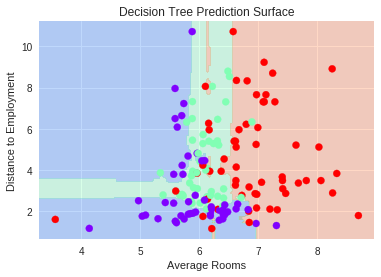

In [144]:
#@title Watch how the decision surface changes as we add more trees. { run: "auto" }
n_estimators = 100 #@param {type:"slider", min:1, max:100, step:1}
plot_random_forest(n_estimators)

Random Forest Algorithm:


**RANDOMLY select observations (rows) from the dataset with replacement**

For a **RANDOM subset of features** (here Average Rooms and Distance to Employment):
> Calculate the loss at each split point

Choose the feature and split point that minimizes the loss function (Gini impurity)

Repeat this process recursively on the 2 datasets resulting from this split

Keep going until either:
> Tree has no loss (default)

> Minimum number of observations allowed per leaf threshold is reached

> Maximum depth of tree allowed is reached

**Build many of these trees, and average their predictions together**

## Gradient Boosting

Rather than building a number of weak trees and averaging them as in random forests, here we build trees sequentially. Each tree learns a little from the mistakes of the trees that came before it. As we continue to add trees, our model grows stronger (until eventually it reaches a point at which it begins to overfit).



*Gradient Boosting Algorithm*

1) Build a simple decision tree. 

2) Generate predictions from the tree.

3) Multiply the predictions by a learning rate fraction (0< learning rate < 1)

4) Compute the errors resulting from these predictions

5) Build a new decision tree on the errors from part 4

6) Repeat steps 1-5 until the ensemble begins to overfit



Let's move back to regression (predicting the median neighborhood values rather than the tercile), and check out a gradient boosting ensemble in action.

First, we will use only a random sample of 150 observations, and only a single predictor "Average Rooms".

In [0]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor


Text(0,0.5,'Median Value')

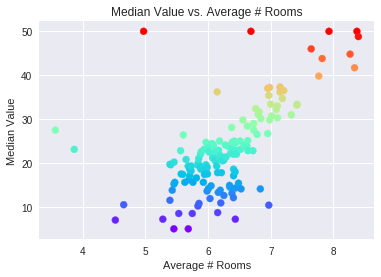

In [146]:
%matplotlib inline
from matplotlib import pyplot as plt

# subset of the training data to make visualization more manageable
boosting_subset = housing_train.sample(n=150, random_state=1991, replace=False)
boosting_subset = boosting_subset.sort_values('Avg_Rooms')
boosting_subset_x = boosting_subset['Avg_Rooms']
boosting_subset_y = boosting_subset['Median_Val']
plt.scatter(boosting_subset_x, boosting_subset_y, c=boosting_subset_y, cmap = 'rainbow')
plt.title('Median Value vs. Average # Rooms')
plt.xlabel('Average # Rooms')
plt.ylabel('Median Value')

In [0]:
train_error = np.empty(100) * np.nan
valid_error = np.empty(100) * np.nan



In [0]:
def plot_gradient_boosting(num_trees=1, learn_rate = 0.30):
    
    data_x = boosting_subset_x.values.reshape(-1, 1)
    data_y = boosting_subset_y
    cmap = 'rainbow'

    gradient_boosting_estimator = GradientBoostingRegressor(random_state = 1991,
                                      n_estimators = num_trees,
                                      learning_rate = learn_rate,
                                      min_samples_leaf = 2,
                                      max_depth = 1)
    gradient_boosting_estimator = gradient_boosting_estimator.fit(data_x, data_y)

    gradient_boosting_predictions = gradient_boosting_estimator.predict(data_x)
    gradient_boosting_residuals = data_y - gradient_boosting_predictions
    
    # generate predictions on validation dataset
    validation_predictions = gradient_boosting_estimator.predict(housing_valid['Avg_Rooms'].values.reshape(-1,1))
    train_mse = mean_squared_error(boosting_subset_y, gradient_boosting_predictions)
    valid_mse = mean_squared_error(housing_valid['Median_Val'].values, validation_predictions)
    train_error[num_trees-1] = train_mse
    valid_error[num_trees-1] = valid_mse
    
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize = (20,5))
    ax1.scatter(data_x, gradient_boosting_predictions, c = gradient_boosting_predictions, s = 50, cmap = cmap)
    ax1.set_title('Gradient Boosting Predicted Values - ' +  str(num_trees) + ' iteration(s)')
    ax1.axis((3.5,8.5,0,55))
    ax2.scatter(data_x, gradient_boosting_residuals, c = np.abs(gradient_boosting_residuals), s = 50, cmap = cmap)
    ax2.set_title('Gradient Boosting Residuals - ' +  str(num_trees) + ' iteration(s)')
    ax2.axis((3.5,8.5,-30,30))
    ax3.plot(range(0,num_trees), train_error[0:num_trees], label = 'train')
    ax3.plot(range(0,num_trees), valid_error[0:num_trees], label = 'valid')
    ax3.set_title('Gradient Boosting Validation Error - ' + str(num_trees) + ' iteration(s)')
    ax3.legend(loc = 'upper right')


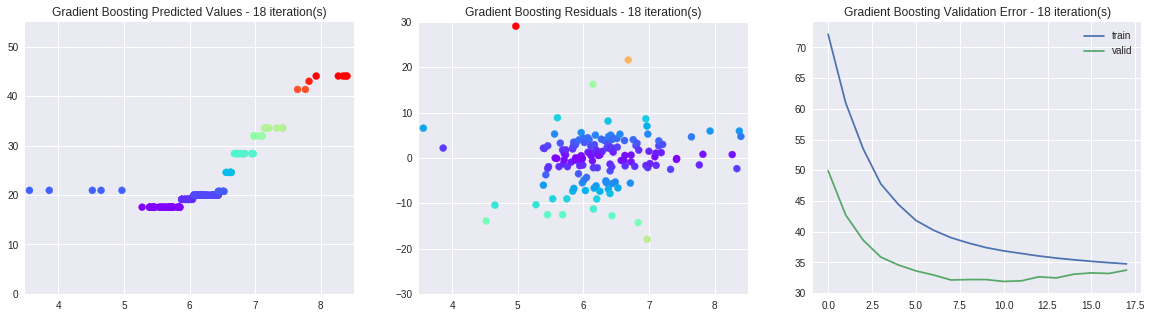

In [172]:
#@title Watch how the predictons and error change as we add more trees. { run: "auto" }
num_trees = 18 #@param {type:"slider", min:1, max:100, step:1}
learn_rate = 0.25 #@param {type:"slider", min:0.01, max:1, step:0.01}

plot_gradient_boosting(num_trees, learn_rate)


In [173]:
print('Minimum error of ', np.nanmin(valid_error), ' reached after ', np.nanargmin(valid_error)+1, 'iterations')

Minimum error of  31.89411538267021  reached after  11 iterations


In [0]:
# reset training and validation error
train_error = np.empty(100) * np.nan
valid_error = np.empty(100) * np.nan

Let's try again with a much higher learning rate

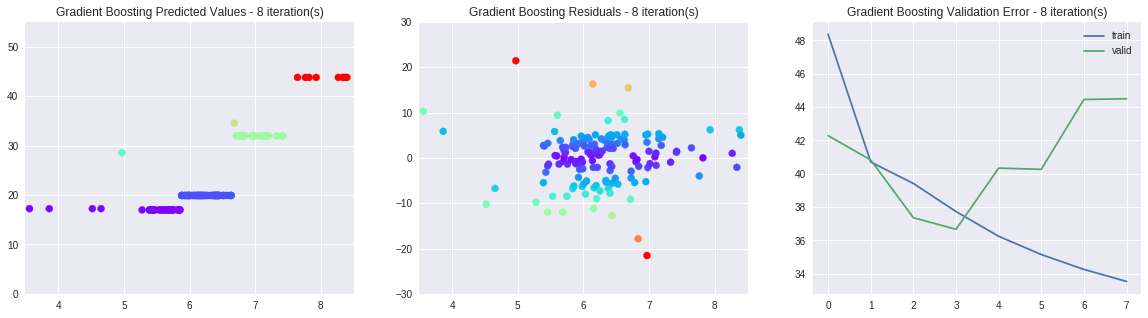

In [184]:
#@title Watch how the predictons and error change as we add more trees. { run: "auto" }
num_trees = 8 #@param {type:"slider", min:1, max:100, step:1}
learn_rate = 0.96 #@param {type:"slider", min:0.01, max:1, step:0.01}

plot_gradient_boosting(num_trees, learn_rate)

In [185]:
print('Minimum error of ', np.nanmin(valid_error), ' reached after ', np.nanargmin(valid_error)+1, 'iterations')

Minimum error of  36.66103012109583  reached after  4 iterations


## Comparison of Model Performance


Now that the underlying model approaches have been introduced, we will now select the 'best' model for this data set by analyzing performance on the validation data set. This champion model will then be utilized to generate predictions on the unseen test data set for a more complete picture of 'out of sample' performance.

In [0]:
predictor_vars = ['Crime_Rate', 'Prop_Zoned', 'Prop_NonRetail', 'Borders_River',
                   'Conc_NO2', 'Avg_Rooms','Prop_Pre1940', 'Dist_Employ', 
                   'Hway_Access', 'TeachStu_Ratio']

We will try building decision trees with varying parameters of maximum depth and leaf size, and evaluate which combination looks most promising on the validation data. 

In [186]:
# Test Decision Trees with Different Maximum Depths / Minimum Leaf Sizes

from itertools import product

maximum_tree_depths = [1,3,5,7,9]
minimum_tree_leaf_sizes = [1,5,10,15]

tree_results = pd.DataFrame(list(product(maximum_tree_depths, minimum_tree_leaf_sizes)), columns=['Max_Depth', 'Leaf_Size'])
tree_results['MSE'] = np.NAN

tree_results

,Max_Depth,Leaf_Size,MSE
0,1,1,NaN
1,1,5,NaN
2,1,10,NaN
3,1,15,NaN
4,3,1,NaN
5,3,5,NaN
6,3,10,NaN
7,3,15,NaN
8,5,1,NaN
9,5,5,NaN


In [189]:
for a_row in range(len(tree_results)):
  
  # build a decision tree
  decision_tree = DecisionTreeRegressor(max_depth = tree_results['Max_Depth'][a_row],
                                       min_samples_leaf = tree_results['Leaf_Size'][a_row],
                                       random_state = 1991)
  
  # fit the decision tree
  decision_tree = decision_tree.fit(housing_train[predictor_vars], housing_train['Median_Val'])
  # generate predictions
  tree_predictions = decision_tree.predict(housing_valid[predictor_vars])
  # generate error
  tree_error = mean_squared_error(tree_predictions, housing_valid['Median_Val'])
  # fill in column in test results
  tree_results.loc[a_row, 'MSE'] = tree_error
  
tree_results

,Max_Depth,Leaf_Size,MSE
0,1,1,36.727668
1,1,5,36.727668
2,1,10,36.727668
3,1,15,36.727668
4,3,1,22.714509
5,3,5,18.215527
6,3,10,19.115904
7,3,15,20.077613
8,5,1,20.667614
9,5,5,16.076140


The decision tree with lowest validation error had a maximum depth of 5 and minimum leaf size of 5. 

We wil now run a similar exercise for different parameter values of maximum depth, minimum leaf size, and number of trees in the ensemble. 

In [0]:
# Test Random Forests with Different Maximum Depths / Minimum Leaf Sizes / Number of Trees

maximum_rf_depths = [5,1000]
minimum_rf_leaf_sizes = [1,5,10]
number_rf_trees = [50,100]

rf_results = pd.DataFrame(list(product(maximum_rf_depths, minimum_rf_leaf_sizes, number_rf_trees)), columns=['Max_Depth', 'Leaf_Size', 'Num_Trees'])
rf_results['MSE'] = np.NAN


In [191]:
for a_row in range(len(rf_results)):
  
  # build a random forest
  random_forest = RandomForestRegressor(max_depth = rf_results['Max_Depth'][a_row],
                                       min_samples_leaf = rf_results['Leaf_Size'][a_row],
                                       n_estimators = rf_results['Num_Trees'][a_row],
                                       random_state = 1991)
  
  # fit the random forest
  random_forest = random_forest.fit(housing_train[predictor_vars], housing_train['Median_Val'])
  # generate predictions
  rf_predictions = random_forest.predict(housing_valid[predictor_vars])
  # generate error
  rf_error = mean_squared_error(rf_predictions, housing_valid['Median_Val'])
  # fill in column in test results
  rf_results.loc[a_row, 'MSE'] = rf_error
  
rf_results

,Max_Depth,Leaf_Size,Num_Trees,MSE
0,5,1,50,15.997942
1,5,1,100,15.748370
2,5,5,50,17.048671
3,5,5,100,16.859586
4,5,10,50,17.159426
5,5,10,100,17.350800
6,1000,1,50,14.847628
7,1000,1,100,14.682771
8,1000,5,50,16.405488
9,1000,5,100,16.182311


The best parameters for the random forest on the validation set were a max_depth of 1000, min leaf size of 1, and 100 treees. 

On to gradient boosting, where we will vary the max depth, number of trees, and learning rate:

In [0]:
# Test Gradient Boosting with Different Maximum Depths / Number of Trees / Learn Rates

maximum_gb_depths = [1,7]
number_gb_trees = [30,300]
gb_learn_rate = [.05,.3,]

gb_results = pd.DataFrame(list(product(maximum_gb_depths, number_gb_trees, gb_learn_rate)), columns=['Max_Depth', 'Num_Trees', 'Learn_Rate'])
gb_results['MSE'] = np.NAN



In [194]:
for a_row in range(len(gb_results)):
  
  # build a gradient booster
  gradient_boost = GradientBoostingRegressor(max_depth = gb_results['Max_Depth'][a_row],
                                       n_estimators = gb_results['Num_Trees'][a_row],
                                       learning_rate = gb_results['Learn_Rate'][a_row],
                                       min_samples_leaf = 5,
                                       random_state = 1991)
  
  # fit the gradient booster
  gradient_boost = gradient_boost.fit(housing_train[predictor_vars], housing_train['Median_Val'])
  # generate predictions
  gb_predictions = gradient_boost.predict(housing_valid[predictor_vars])
  # generate error
  gb_error = mean_squared_error(gb_predictions, housing_valid['Median_Val'])
  # fill in column in test results
  gb_results.loc[a_row, 'MSE'] = gb_error
  
gb_results

,Max_Depth,Num_Trees,Learn_Rate,MSE
0,1,30,0.05,27.064053
1,1,30,0.30,16.236521
2,1,300,0.05,17.032141
3,1,300,0.30,21.732335
4,7,30,0.05,15.390569
5,7,30,0.30,15.665989
6,7,300,0.05,14.566471
7,7,300,0.30,15.929351


The best gradient boosting ensemble (on the validation set) was constructed using 300 trees with a max depth of 7 and 0.05 learning rate.


We will now retrain each model type utilizing the optimal parameters identified in the validation procedure above. 

In [0]:

# decision tree
decision_tree = DecisionTreeRegressor(max_depth = 5,
                                     min_samples_leaf = 5,
                                     random_state = 1991)
decision_tree = decision_tree.fit(housing_train[predictor_vars], housing_train['Median_Val'])

# random forest
random_forest = RandomForestRegressor(max_depth = 1000,
                                     min_samples_leaf = 1,
                                     n_estimators = 100,
                                     random_state = 1991)
random_forest = random_forest.fit(housing_train[predictor_vars], housing_train['Median_Val'])

# gradient boosting
gradient_boost = GradientBoostingRegressor(max_depth = 7,
                                     n_estimators = 300,
                                     learning_rate = 0.05,
                                     random_state = 1991,
                                     min_samples_leaf = 5)

# fit the gradient booster
gradient_boost = gradient_boost.fit(housing_train[predictor_vars], housing_train['Median_Val'])

We now generate predictions (along with a simple 'average' baseline) to evaluate how well the 'best' models identified through the validation procedure perform on the unseen test data.

In [0]:

# simple average predictions
avg_predictions = [housing_train['Median_Val'].mean()] * len(housing_test)
# decision tree predictions
tree_predictions = decision_tree.predict(housing_test[predictor_vars])
# random forest predictions
rf_predictions = random_forest.predict(housing_test[predictor_vars])
# gradient boosting predictions
gb_predictions = gradient_boost.predict(housing_test[predictor_vars])


# errors across the models
avg_error = mean_squared_error(avg_predictions, housing_test['Median_Val'])
tree_error = mean_squared_error(tree_predictions, housing_test['Median_Val'])
rf_error = mean_squared_error(rf_predictions, housing_test['Median_Val'])
gb_error = mean_squared_error(gb_predictions, housing_test['Median_Val'])


In [196]:
print('Test Error Using Average from Training Set:', avg_error)
print('Test Error Using Decision Tree:',tree_error)
print('Test Error Using Random Forest:',rf_error)
print('Test Error Using Gradient Boosting:',gb_error)

Test Error Using Average from Training Set: 74.4672484799688
Test Error Using Decision Tree: 22.481190777407587
Test Error Using Random Forest: 20.947724766237695
Test Error Using Gradient Boosting: 16.067302058346833


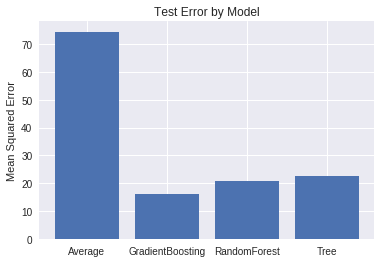

In [197]:
# Barplot
result_height = [avg_error, tree_error, rf_error, gb_error]
result_bars = ('Average', 'Tree', 'RandomForest', 'GradientBoosting')

# Create bars
plt.bar(result_bars, result_height)

# add in a title
plt.title('Test Error by Model' )
plt.ylabel('Mean Squared Error')

# Show graphic
plt.show()


All models beat our lazy benchmark by some distance. Consistent with validation performance, the gradient boosting ensemble exhibited the strongest test performance, followed by the random forest. 

## Extracting Insight from the Selected Model

Now that we have selected our champion model and confirmed its efficacy utilizing the out of sample test data, we will attempt to leverage additional tools to better understand the insights that drive its predictions.

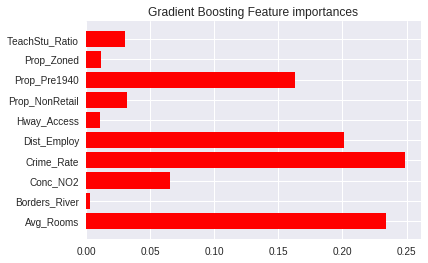

,Feature,Importance
0,Crime_Rate,0.248715
5,Avg_Rooms,0.233795
7,Dist_Employ,0.200832
6,Prop_Pre1940,0.163058
4,Conc_NO2,0.065188
2,Prop_NonRetail,0.031822
9,TeachStu_Ratio,0.030271
1,Prop_Zoned,0.011855
8,Hway_Access,0.011212
3,Borders_River,0.003253


In [199]:
# variable importances from model
gb_importances = gradient_boost.feature_importances_

# Plot the feature importances of the ensemble
plt.figure()
plt.title("Gradient Boosting Feature importances")
plt.barh(predictor_vars, gb_importances, color="r", align="center")

plt.show()

pd.DataFrame({'Feature' : predictor_vars, 'Importance': gb_importances}).sort_values("Importance", ascending = False)

Having identified the most important variables from the model are the crime rate, average number of rooms and distance to employment, we can dig deeper into their marginal impacts and key interactions with other variables:

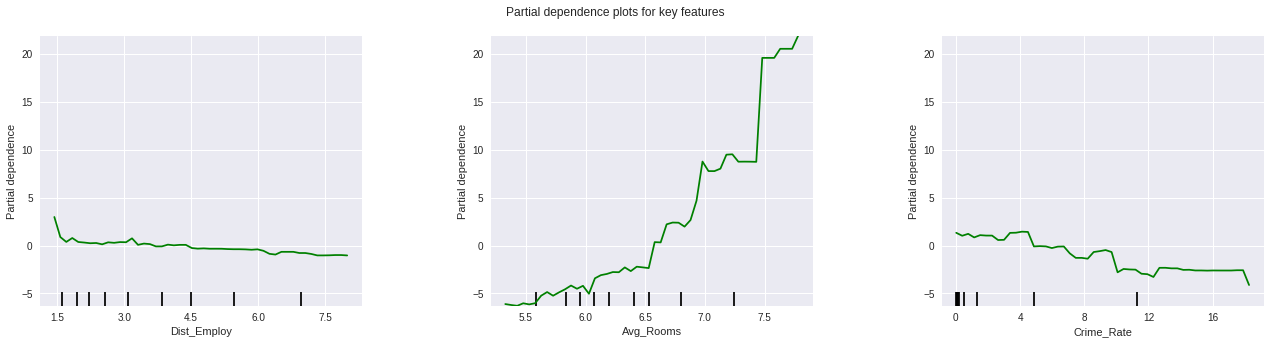

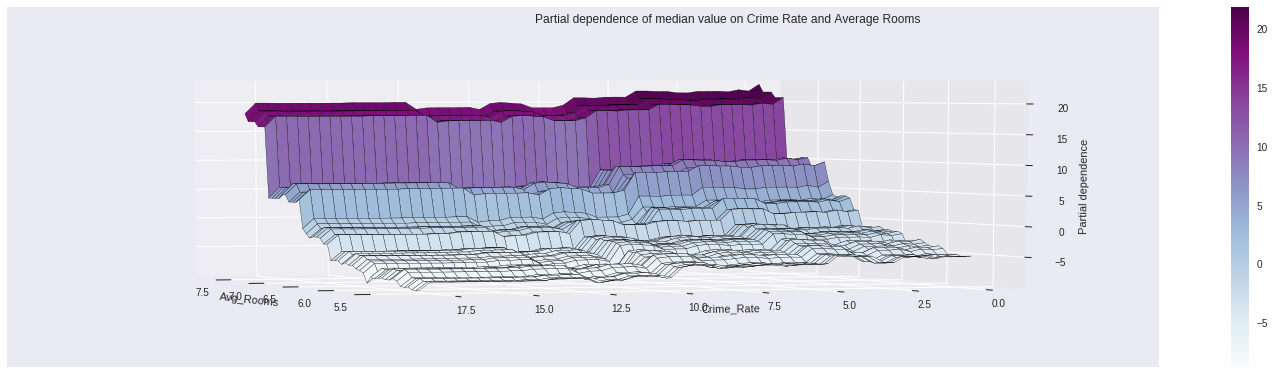

In [200]:
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from mpl_toolkits.mplot3d import Axes3D

names = predictor_vars
features = [7,5,0]
fig, axs = plot_partial_dependence(gradient_boost, housing_train[predictor_vars], features,
                                   feature_names=predictor_vars,
                                   n_jobs=1, grid_resolution=50,
                                  figsize = (20,5))
fig.suptitle('Partial dependence plots for key features')
plt.subplots_adjust(top=0.9) 
fig = plt.figure(figsize = (20,5))

target_feature = (5, 0)
pdp, axes = partial_dependence(gradient_boost, target_feature,
                               X=housing_train[predictor_vars], grid_resolution=50)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].reshape(list(map(np.size, axes))).T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                       cmap=plt.cm.BuPu, edgecolor='k')
ax.set_xlabel(names[target_feature[0]])
ax.set_ylabel(names[target_feature[1]])
ax.set_zlabel('Partial dependence')
ax.view_init(elev=3, azim=160)
plt.colorbar(surf)
plt.suptitle('Partial dependence of median value on Crime Rate and Average Rooms')
plt.subplots_adjust(top=0.9)

plt.show()